In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ALLCools.plot import *

## Cell Tidy Data

In [2]:
cell_tidy_data = pd.read_msgpack(
    '/home/hanliu/project/mouse_rostral_brain/study/ClusteringSummary/Summary/TotalClusteringResults.msg'
)

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The read_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
cell_tidy_data.columns

Index(['AllcPath', 'CCC_Rate', 'CG_Rate', 'CG_RateAdj', 'CH_Rate',
       'CH_RateAdj', 'FinalReads', 'InputReads', 'MappedReads', 'Region',
       'index_name', 'uid', 'BamFilteringRate', 'MappingRate', 'Pos96',
       'Plate', 'Col96', 'Row96', 'Col384', 'Row384', 'FACS_Date', 'Slice',
       'MajorRegion', 'SubRegion', 'CellClass', 'l1-umap_0', 'l1-umap_1',
       'l1-tsne_0', 'l1-tsne_1', 'MajorType', 'l2-umap_0', 'l2-umap_1',
       'l2-tsne_0', 'l2-tsne_1', 'SubType', 'l3-umap_0', 'l3-umap_1',
       'l3-tsne_0', 'l3-tsne_1', 'L1CellClass'],
      dtype='object')

In [4]:
cell_tidy_data.head()

,AllcPath,CCC_Rate,CG_Rate,CG_RateAdj,CH_Rate,CH_RateAdj,FinalReads,InputReads,MappedReads,Region,...,l2-umap_0,l2-umap_1,l2-tsne_0,l2-tsne_1,SubType,l3-umap_0,l3-umap_1,l3-tsne_0,l3-tsne_1,L1CellClass
10E_M_0,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.008198,0.822633,0.821166,0.041640,0.033718,1626504.0,4407752,2892347.0,10E,...,-23.368460,-1.151200,-34.021153,-19.429447,MGE-Sst Rxra,-0.766630,-16.704815,20.297781,1.192093,Inh
10E_M_1,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006019,0.743035,0.741479,0.024127,0.018218,2009998.0,5524084,3657352.0,10E,...,-8.322600,-3.988057,19.205085,10.272570,CA3 Cadm2,4.290240,-2.610511,7.860870,8.813396,Exc-HPF
10E_M_10,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006569,0.750172,0.748520,0.027665,0.021235,1383636.0,3455260,2172987.0,10E,...,-7.409779,-4.662556,20.146606,6.345836,CA3 Cadm2,5.852028,-2.510058,12.927795,8.544050,Exc-HPF
10E_M_101,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.006353,0.760898,0.759369,0.026547,0.020323,2474670.0,7245482,4778768.0,10E,...,-6.266342,-8.345406,25.465765,-6.767192,CA3 Cadm2,11.189178,-3.763147,29.875836,2.739283,Exc-HPF
10E_M_102,/gale/raidix/rdx-4/mapping/10E/CEMBA190625-10E...,0.005409,0.752980,0.751637,0.019497,0.014164,2430290.0,7004754,4609570.0,10E,...,-1.135772,-17.311239,-7.427455,-20.497435,CA1 Chrm3,2.912797,2.683262,-19.971042,24.551260,Exc-HPF


## rc

In [5]:
from matplotlib import rc

labelsize = 6
linewidth = 0.1
rc('lines', linewidth=linewidth)
rc('axes', labelsize=labelsize, linewidth=linewidth)
rc('xtick', labelsize=labelsize)
rc('ytick', labelsize=labelsize)
rc('xtick.major', width=linewidth)
rc('ytick.major', width=linewidth)
rc('xtick.minor', width=linewidth-0.2)
rc('ytick.minor', width=linewidth-0.2)


## Palette

In [6]:
region_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/dissection_region.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
sub_region_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_region.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
major_region_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_region.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
cell_class_order = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/order/CellClass.order.txt',
    index_col=0,
    header=None,
    sep='\t').index
major_type_order = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/order/MajorType-Copy1.order_by_l1_analysis_and_name.txt',
    index_col=0,
    header=None,
    sep='\t').index

cell_class_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/cell_class.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
major_type_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/major_type.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()
sub_type_palette = pd.read_csv(
    '/home/hanliu/project/mouse_rostral_brain/metadata/palette/sub_type.palette.csv',
    header=None,
    index_col=0,
    squeeze=True).to_dict()

for sub_type in cell_tidy_data['SubType'].unique():
    if sub_type not in sub_type_palette:
        # outlier and NA color
        sub_type_palette[sub_type] = '#D3D3D3'

## Sunburst

In [7]:
cell_tidy_data['L1CellClass'].value_counts()

Exc        53387
Inh        26891
GC          7962
Exc-HPF     7906
NonN        7836
Name: L1CellClass, dtype: int64

### Raw

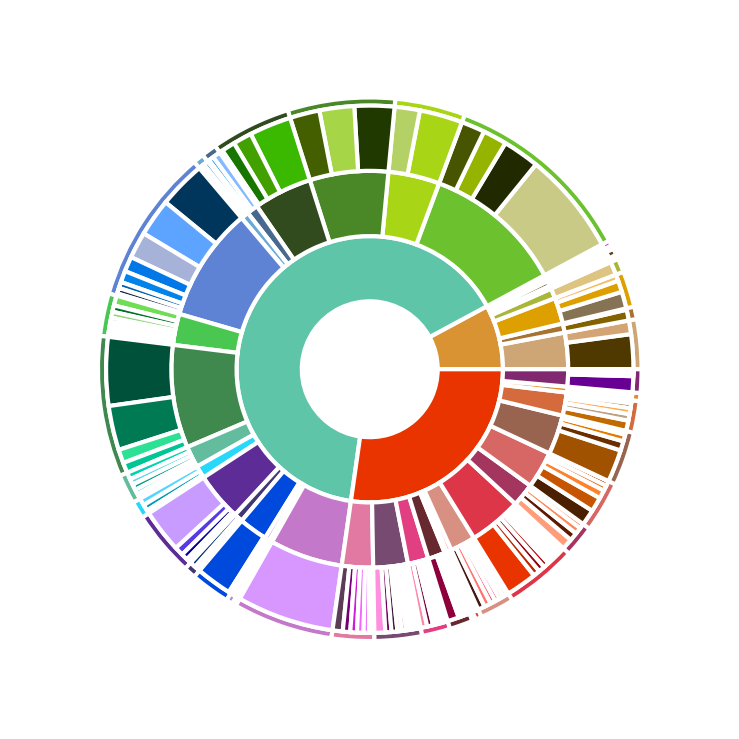

In [11]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
_cell_tidy_data = cell_tidy_data[['CellClass', 'MajorType', 'SubType']].copy()

sunbrust(pie_data=_cell_tidy_data,
         order_dict={
             'CellClass': cell_class_order.tolist(),
             'MajorType': major_type_order.tolist()
         },
         ax=ax,
         anno_col=1,
         text_anno=False,
         anno_layer_size=0.03,
         col_color_dict={
             'CellClass': cell_class_palette,
             'MajorType': major_type_palette,
             'SubType': sub_type_palette
         },
         startangle=0,
         anno_ang_min=0.001,
         text_expend=1.05,
         uniform_section=False)

for t in ax.texts:
    t.set_fontsize(5)
    
fig.savefig('files/Sunburst.pdf')

## Merge an anno layer

In [9]:
cell_tidy_data[cell_tidy_data['MajorType'] == 'CA3']['SubType'].value_counts()

CA3 Cadm2    2284
CA3 Efnb2     139
Name: SubType, dtype: int64

In [28]:
anno_layer_map = {
    'ODC': 'NonN',
    'OPC': 'NonN',
    'ASC': 'NonN',
    'MGC': 'NonN',
    'EC': 'NonN',
    'PC': 'NonN',
    'VLMC': 'NonN',
    'VLMC-Pia': 'NonN',
    'ANP': 'NonN',
    'IT-L23': 'Cortex IT',
    'IT-L4': 'Cortex IT',
    'IT-L5': 'Cortex IT',
    'IT-L6': 'Cortex IT',
    'CLA': 'EP/CLA',
    'EP': 'EP/CLA',
    'OLF-Exc': 'OLF Exc',
    'PT-L5': 'Cortex PT',
    'CT-L6': 'Cortex CT',
    'NP-L6': 'NP',
    'L6b': 'L6b',
    'CA1': 'CA Exc',
    'IG-CA2': 'CA Exc',
    'CA3': 'CA Exc',
    'CA3-St18': 'CA Exc',
    'Gfra1': 'CA Exc',
    'DG-po': 'CA Exc',
    'DG': 'DG',
    'MGE-Pvalb': 'Cortex/HPF MGE',
    'MGE-Sst': 'Cortex/HPF MGE',
    'CGE-Vip': 'Cortex/HPF CGE',
    'CGE-Lamp5': 'Cortex/HPF CGE',
    'Unc5c': 'Cortex/HPF Unc5c',
    'Chd7': 'PAL',
    'LSX-Inh': 'LSX',
    'PAL-Inh': 'PAL',
    'Foxp2': 'Foxp2',
    'MSN-D1': 'D1',
    'MSN-D2': 'D2',
    'D1L-Fstl4': 'D1L-Fstl4',
    'D1L-PAL': 'D1L-PAL',
    'OLF': 'OLF Granule'
}
anno_layer_order = [
    'NonN', 'Cortex IT', 'EP/CLA', 'OLF Exc', 'Cortex PT', 'Cortex CT',
    'NP', 'L6b', 'CA Exc', 'DG', 'Cortex/HPF MGE', 'Cortex/HPF CGE', 
    'LSX', 'PAL', 'Foxp2', 'D1', 'D2', 'D1L-Fstl4', 'D1L-PAL', 'OLF Granule'
]
cell_tidy_data['AnnoLayer'] = cell_tidy_data['MajorType'].map(anno_layer_map)

In [29]:
cell_tidy_data['SubType'].isna().sum()

0

/home/hanliu/miniconda3/envs/clustering/lib/python3.7/site-packages/ALLCools/plot/sunburst.py:192: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  rotation_mode='anchor')


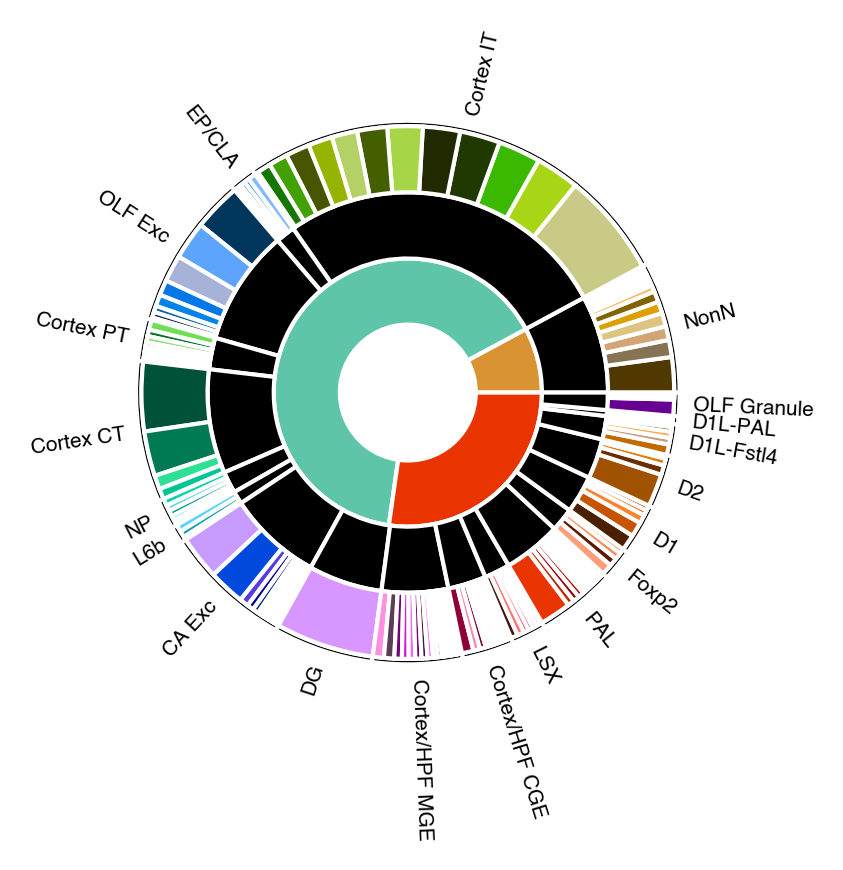

In [33]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
_cell_tidy_data = cell_tidy_data[['CellClass', 'AnnoLayer', 'SubType']].copy()

sunbrust(pie_data=_cell_tidy_data,
         order_dict={
             'CellClass': cell_class_order.tolist(),
             'AnnoLayer': anno_layer_order
         },
         ax=ax,
         anno_col=1,
         text_anno='text',
         anno_layer_size=0.02,
         col_color_dict={
             'CellClass': cell_class_palette,
             'AnnoLayer': {i: 'k' for i in anno_layer_order},
             'SubType': sub_type_palette
         },
         startangle=0,
         anno_ang_min=0.001,
         text_expend=1.05,
         uniform_section=False)

for t in ax.texts:
    t.set_fontsize(5)
    
fig.savefig('files/Sunburst.special_anno.pdf')